In [16]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from multiprocessing import Pool
from tqdm import tqdm

In [9]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

def load_databatch(data_folder, idx, img_size=64):
    data_file = os.path.join(data_folder, 'train_data_batch_')

    d = unpickle(data_file + str(idx))
    x = d['data']
    y = d['labels']
    mean_image = d['mean']

    img_size2 = img_size * img_size

    x = np.dstack((x[:, :img_size2], x[:, img_size2:2*img_size2], x[:, 2*img_size2:]))
    x = x.reshape((x.shape[0], img_size, img_size, 3))

    return x

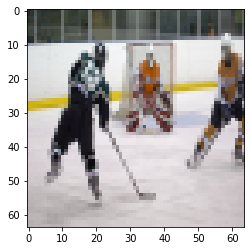

In [13]:
root = Path('/home/ritwik/imagenet_64/')
test = load_databatch(root, 1, img_size=64)
plt.imshow(test[0])

In [19]:
def _write_img(idx):
    batch = load_databatch(root, idx, img_size=64)
    for ii, img in enumerate(batch):
        im_write = Image.fromarray(img)
        im_write.save(root / 'images' / f'{idx}_{ii}.png')


pool = Pool(10)
r = list(tqdm(pool.imap(_write_img, range(1, 11)), total=10))

100%|██████████| 10/10 [02:06<00:00, 12.69s/it]
